In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout

In [16]:
data=pd.read_csv("/content/Crystal_structure.csv")
data.head()

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [17]:
data.drop(data.iloc[:,0:3],axis=1,inplace=True)
data['In literature'] = data['In literature'].replace({False: 0, True: 1})
data.head()



,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,0,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,0,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,0,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,0,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic


In [18]:
target=data["Lowest distortion"].astype(str)
data.drop(["Lowest distortion"],axis=1,inplace=True)
features=data
features



,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,0,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000
1,0,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571
2,0,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714
3,0,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429
4,0,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857
5325,0,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857
5326,0,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571
5327,0,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571


In [19]:
features.replace("-",np.nan,inplace=True)
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

# Imputer object using the mean strategy and
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
imputer = imputer.fit(features)

# Imputing the data
features = imputer.transform(features)

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(features)
features=min_max_scaler.transform(features)
features=pd.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.000000,0.000000,0.527950,0.607143,0.607143,0.177143,0.177143,0.00000,0.000000,0.449816,0.321123,0.622084,0.607143
1,0.0,0.000000,0.000000,0.527950,0.607143,0.485714,0.177143,0.651429,0.00000,0.826765,0.591802,0.372063,0.622084,0.485714
2,0.0,0.000000,0.000000,0.527950,0.607143,0.192857,0.177143,0.468571,0.00000,0.628921,0.741155,0.531650,0.622084,0.192857
3,0.0,0.000000,0.000000,0.527950,0.607143,0.178571,0.177143,0.794286,0.00000,0.641990,0.797141,0.541178,0.622084,0.178571
4,0.0,0.000000,0.000000,0.527950,0.607143,0.471429,0.177143,1.000000,0.00000,0.768735,0.651116,0.378545,0.622084,0.471429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0,0.200000,1.000000,0.385093,0.321429,0.250000,0.308571,0.897143,0.72221,0.579982,0.798225,0.415246,0.625479,0.250000
5325,0.0,0.320128,0.450754,0.385093,0.321429,0.450000,0.308571,0.245714,0.72221,0.742629,0.607500,0.318061,0.622084,0.450000
5326,0.0,0.320128,0.450754,0.385093,0.321429,0.485714,0.308571,0.177143,0.72221,0.738926,0.578964,0.303144,0.622084,0.485714
5327,0.0,0.320128,0.450754,0.385093,0.321429,0.335714,0.308571,0.491429,0.72221,0.696451,0.701853,0.370481,0.622084,0.335714


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_numeric = label_encoder.fit_transform(target)
target_numeric

array([1, 2, 1, ..., 2, 1, 1])

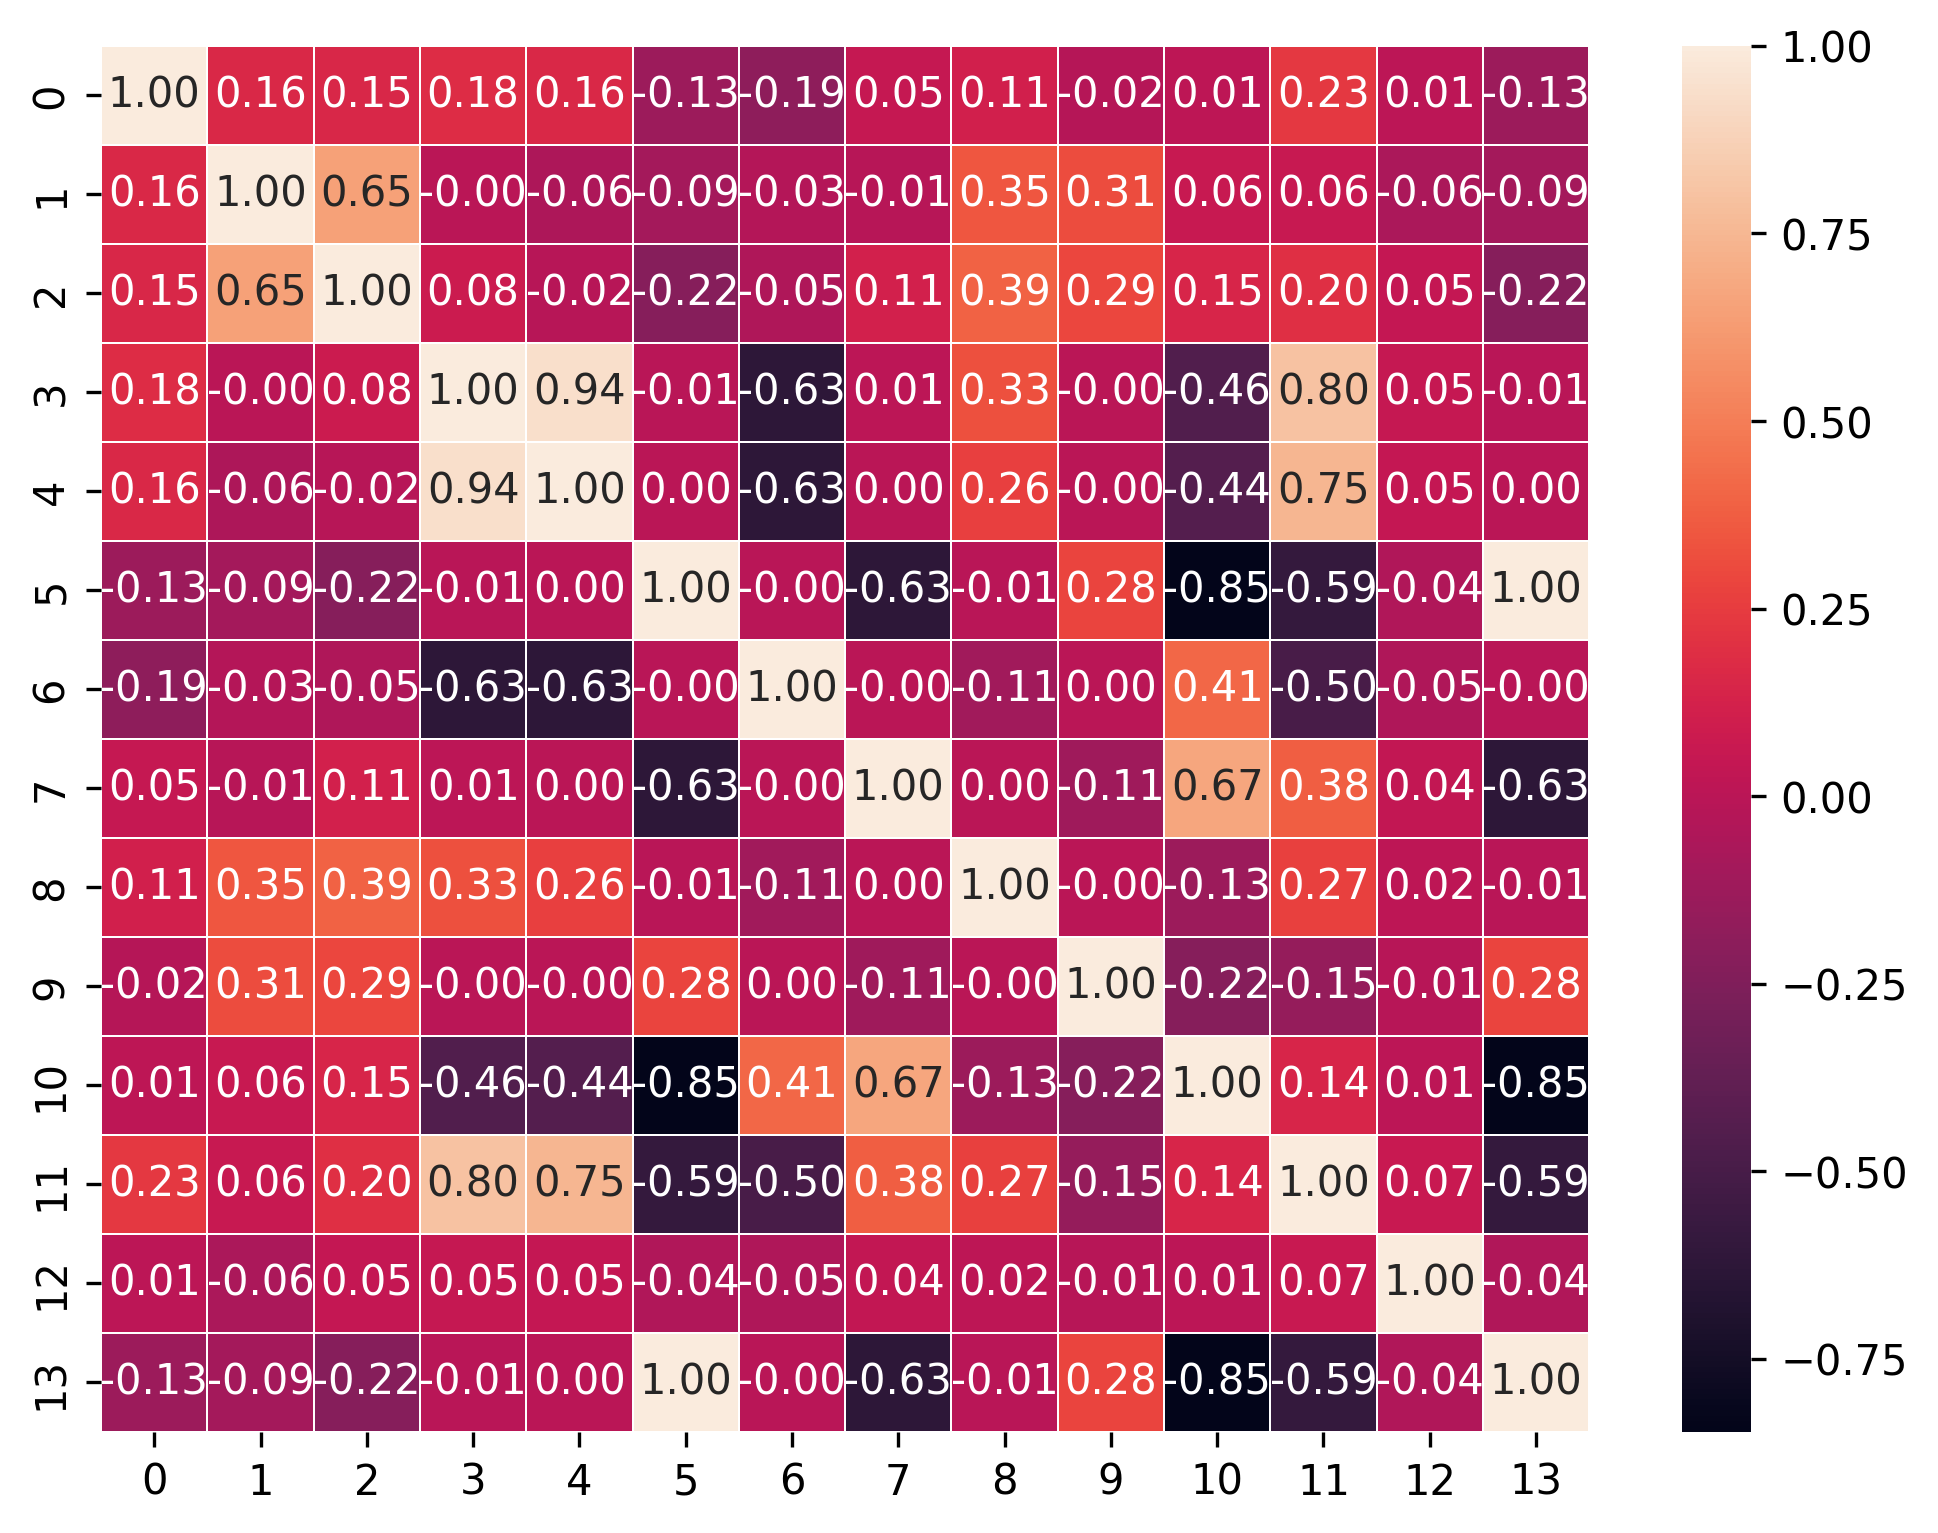

In [22]:
import seaborn as sns
corr = features.corr(method = 'pearson')
plt.figure(figsize=(8,6), dpi =300)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.4)
plt.show()

As r(AXII) is highly correlated(94%) with r(AVI) so any on of them can be neglacted

In [23]:
features.drop(features.iloc[:,2:3],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target_numeric,test_size=0.2,random_state=0)
x_train,y_train,x_test,y_test

(       0    1         3         4         5         6         7         8   \
 3385  0.0  0.0  0.248447  0.285714  0.257143  0.851429  0.805714  0.734057   
 4416  0.0  0.0  0.204969  0.235714  0.292857  0.634286  0.462857  0.000000   
 1433  0.0  0.0  0.360248  0.285714  0.285714  0.594286  0.851429  0.694097   
 4439  0.0  0.0  0.204969  0.235714  0.407143  0.634286  0.234286  0.000000   
 1830  0.0  0.6  0.527950  0.450000  0.000000  0.251429  0.714286  0.771569   
 ...   ...  ...       ...       ...       ...       ...       ...       ...   
 4931  0.0  0.0  0.279503  0.264286  0.214286  0.480000  0.805714  0.624915   
 3264  0.0  0.0  0.540373  0.500000  0.292857  0.194286  0.720000  0.000000   
 1653  0.0  0.0  0.223602  0.257143  0.400000  0.697143  0.280000  0.658889   
 2607  0.0  0.2  0.695652  0.535714  0.235714  0.080000  0.720000  0.836296   
 2732  0.0  0.6  0.621118  0.507143  0.421429  0.200000  0.274286  0.793180   
 
             9         10        11        12     

In [24]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=len(features.columns)))
model.add(Dropout(0.5))
model.add(Dense(units=64,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=256,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(units=5,activation='softmax'))

In [25]:
model.compile(optimizer='AdaDelta',loss='sparse_categorical_crossentropy',metrics='accuracy')


In [26]:
history=model.fit(x_train,y_train,batch_size=35,epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
122/122 [==============================] - 2s 7ms/step - loss: 1.6564 - accuracy: 0.0378 - val_loss: 1.6281 - val_accuracy: 0.0432
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 1.6435 - accuracy: 0.0497 - val_loss: 1.6189 - val_accuracy: 0.0460
Epoch 3/50
122/122 [==============================] - 1s 5ms/step - loss: 1.6278 - accuracy: 0.0880 - val_loss: 1.6096 - val_accuracy: 0.0976
Epoch 4/50
122/122 [==============================] - 1s 5ms/step - loss: 1.6159 - accuracy: 0.1485 - val_loss: 1.6001 - val_accuracy: 0.3227
Epoch 5/50
122/122 [==============================] - 1s 5ms/step - loss: 1.6012 - accuracy: 0.2620 - val_loss: 1.5905 - val_accuracy: 0.5075
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 1.5870 - accuracy: 0.3596 - val_loss: 1.5810 - val_accuracy: 0.6116
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 1.5738 - accuracy: 0.4558 - val_loss: 1.5712 - val_accuracy: 0.6257
Epoch 

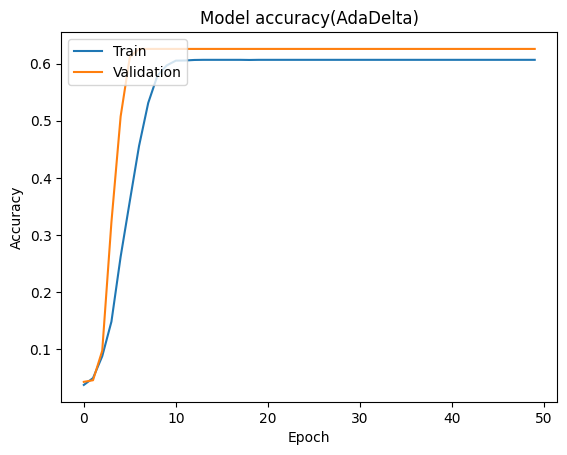

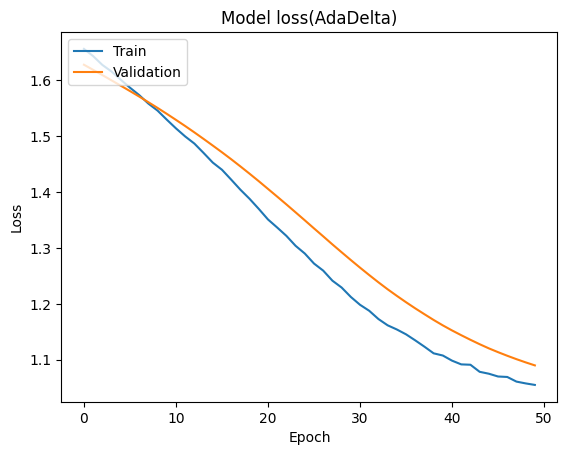

In [27]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy(AdaDelta)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss(AdaDelta)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
y_predict=model.evaluate(x_test,y_test,batch_size=35)

31/31 [==============================] - 0s 5ms/step - loss: 1.0898 - accuracy: 0.6257


In [29]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(x_train, y_train, batch_size=35, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
122/122 [==============================] - 2s 6ms/step - loss: 0.9973 - accuracy: 0.6066 - val_loss: 0.9817 - val_accuracy: 0.6257
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.9699 - accuracy: 0.6068 - val_loss: 0.9437 - val_accuracy: 0.6257
Epoch 3/50
122/122 [==============================] - 1s 4ms/step - loss: 0.9603 - accuracy: 0.6064 - val_loss: 0.9203 - val_accuracy: 0.6463
Epoch 4/50
122/122 [==============================] - 1s 5ms/step - loss: 0.9351 - accuracy: 0.6092 - val_loss: 0.8947 - val_accuracy: 0.6313
Epoch 5/50
122/122 [==============================] - 1s 5ms/step - loss: 0.9224 - accuracy: 0.6165 - val_loss: 0.8782 - val_accuracy: 0.6351
Epoch 6/50
122/122 [==============================] - 1s 4ms/step - loss: 0.9140 - accuracy: 0.6174 - val_loss: 0.8703 - val_accuracy: 0.6285
Epoch 7/50
122/122 [==============================] - 1s 4ms/step - loss: 0.9009 - accuracy: 0.6275 - val_loss: 0.8635 - val_accuracy: 0.6576
Epoch 

In [30]:
y_predict_sgd=model.evaluate(x_test,y_test,batch_size=35)

31/31 [==============================] - 0s 3ms/step - loss: 0.8166 - accuracy: 0.6989


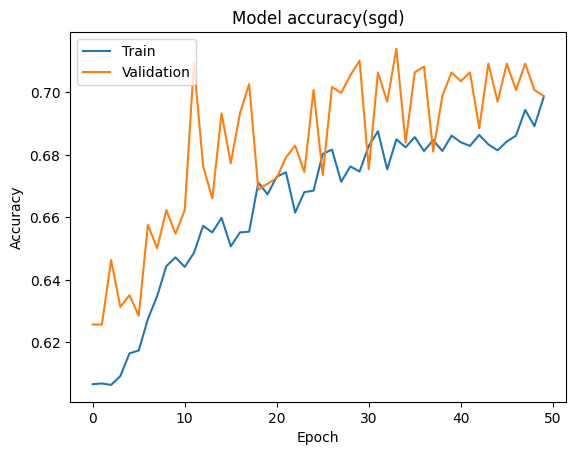

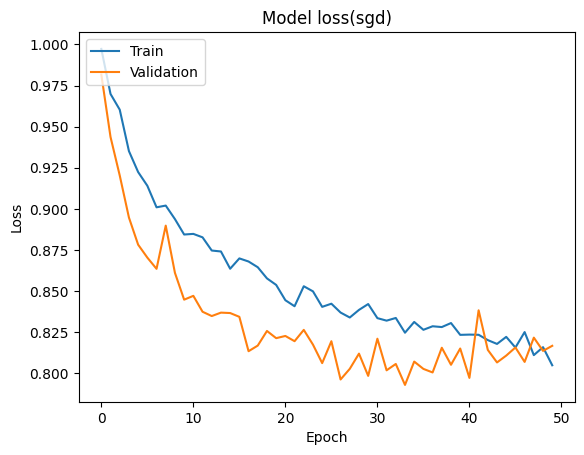

In [31]:
# Plot training & validation accuracy values
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('Model accuracy(sgd)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('Model loss(sgd)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_admdelta = model.fit(x_train, y_train, batch_size=35, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
122/122 [==============================] - 2s 7ms/step - loss: 0.8207 - accuracy: 0.6929 - val_loss: 0.7816 - val_accuracy: 0.7045
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.8131 - accuracy: 0.6972 - val_loss: 0.7961 - val_accuracy: 0.7054
Epoch 3/50
122/122 [==============================] - 1s 5ms/step - loss: 0.8082 - accuracy: 0.6897 - val_loss: 0.8044 - val_accuracy: 0.7064
Epoch 4/50
122/122 [==============================] - 1s 7ms/step - loss: 0.8100 - accuracy: 0.6979 - val_loss: 0.7979 - val_accuracy: 0.7026
Epoch 5/50
122/122 [==============================] - 1s 8ms/step - loss: 0.8077 - accuracy: 0.6948 - val_loss: 0.8041 - val_accuracy: 0.7045
Epoch 6/50
122/122 [==============================] - 1s 9ms/step - loss: 0.8033 - accuracy: 0.6960 - val_loss: 0.8247 - val_accuracy: 0.6989
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 0.7991 - accuracy: 0.6920 - val_loss: 0.8063 - val_accuracy: 0.7017
Epoch 

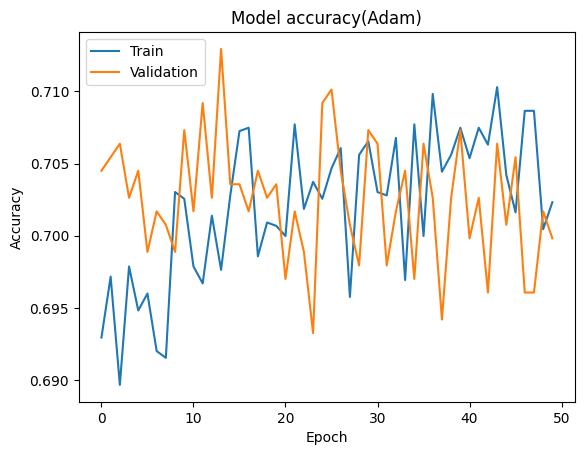

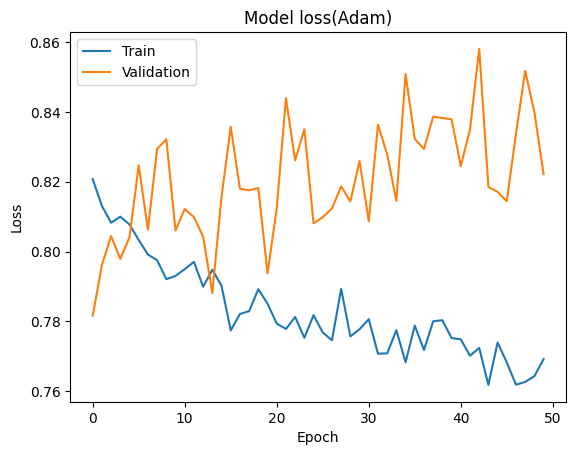

In [33]:
# Plot training & validation accuracy values
plt.plot(history_admdelta.history['accuracy'])
plt.plot(history_admdelta.history['val_accuracy'])
plt.title('Model accuracy(Adam)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_admdelta.history['loss'])
plt.plot(history_admdelta.history['val_loss'])
plt.title('Model loss(Adam)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_rms = model.fit(x_train, y_train, batch_size=35, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
122/122 [==============================] - 2s 7ms/step - loss: 0.7667 - accuracy: 0.7056 - val_loss: 0.8205 - val_accuracy: 0.7008
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.7584 - accuracy: 0.7094 - val_loss: 0.8544 - val_accuracy: 0.6932
Epoch 3/50
122/122 [==============================] - 1s 5ms/step - loss: 0.7700 - accuracy: 0.7058 - val_loss: 0.8550 - val_accuracy: 0.7017
Epoch 4/50
122/122 [==============================] - 1s 5ms/step - loss: 0.7723 - accuracy: 0.7051 - val_loss: 0.8803 - val_accuracy: 0.6970
Epoch 5/50
122/122 [==============================] - 1s 8ms/step - loss: 0.7713 - accuracy: 0.7063 - val_loss: 0.8505 - val_accuracy: 0.7026
Epoch 6/50
122/122 [==============================] - 1s 8ms/step - loss: 0.7699 - accuracy: 0.7096 - val_loss: 0.8533 - val_accuracy: 0.7017
Epoch 7/50
122/122 [==============================] - 1s 6ms/step - loss: 0.7750 - accuracy: 0.7072 - val_loss: 0.8455 - val_accuracy: 0.7036
Epoch 

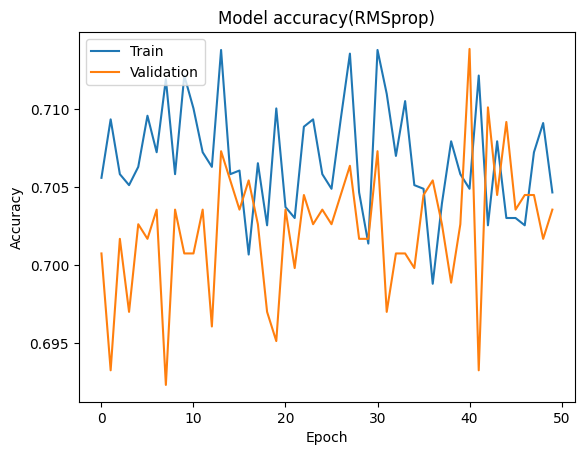

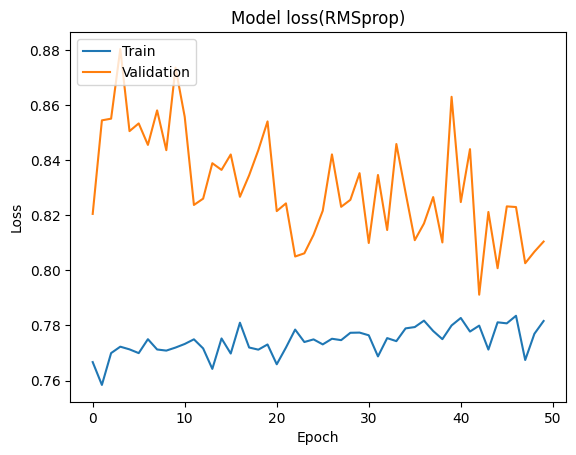

In [35]:
# Plot training & validation accuracy values
plt.plot(history_rms.history['accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.title('Model accuracy(RMSprop)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('Model loss(RMSprop)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Using Adadelta optimizer, 62.57% accuracy can be got and the graph shows a regular change (increasing) in every epoch. And for the others optimizers acuuracy is good and loss function conversed very quickly and fluctuating around some value.And this can be happend by bad learning rate or bad tuning of parameters.